In [55]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [4]:
data=pd.read_csv('../data/profesores_fin.csv')
data.head()
data.columns
#data=data.dropna()
#print(data.shape)
#print(list(data.columns))

Index(['parte_proyecto_inclusion', 'sexo', 'edad', 'departamento', 'ciudad',
       'unidad_educativa', 'nivel_educacion_maximo', 'anios_experiencia',
       'tiempo_ue_actual', 'tiempo_ue_actual_num', 'area_imparte',
       'paso_curso_tec', 'curso', 'pc_casa', 'laptop_escritorio', 'num_pc',
       'tablet', 'num_tablet', 'origen_pc', 'pc_llenado', 'pc_juegos',
       'pc_estudio', 'pc_musica', 'pc_redes', 'pc_nada', 'pc_planificar',
       'pc_clases', 'pc_videos', 'pc_internet', 'tiene_celular',
       'tiene_smartphone', 'cel_llamadas', 'cel_musica', 'cel_juegos',
       'cel_fotos', 'cel_redes', 'cel_text', 'cel_videos', 'cel_internet',
       'internet_casa', 'internet_movil', 'internet_colegio', 'usa_facebook',
       'usa_youtube', 'usa_whatsapp', 'usa_messenger', 'usa_instagram',
       'usa_twiter', 'usa_linkedin', 'usa_skype', 'dias_uso_internet', 'so',
       'conoce_soft_libre', 'existe_laboratorio', 'sabe_inclusion_digital'],
      dtype='object')

In [5]:
# variable dependiente
data['sabe_inclusion_digital'].value_counts()

Sí    636
No    235
Name: sabe_inclusion_digital, dtype: int64

In [6]:
# cambiando el nombre de variable
df = data.rename(columns={'sabe_inclusion_digital': 'target'})

Text(0, 0.5, 'Frecuencia de profesores')

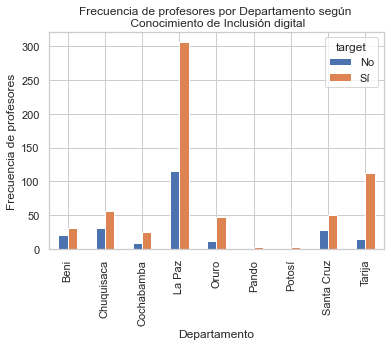

In [9]:
# grafica de target vs departamento
pd.crosstab(df.departamento,df.target).plot(kind='bar')
plt.title('Frecuencia de profesores por Departamento según \n Conocimiento de Inclusión digital')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia de profesores')
#plt.savefig('purchase_fre_job')

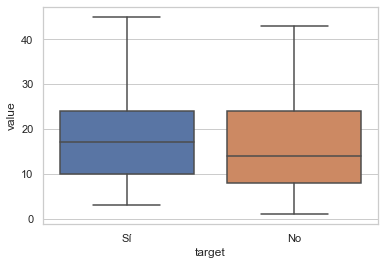

In [33]:
mdf = pd.melt(df[['anios_experiencia','target']], id_vars=['target'], var_name=['anios_experiencia'])  
ax = sns.boxplot(x="target", y="value", data=mdf)
plt.show()

In [ ]:
# no existe valores atipicos, los años de experiencia en ensañanza es reciente con el conocimiento en inclusion digital.

In [35]:
label_encoder = preprocessing.LabelEncoder()
df['y'] = label_encoder.fit_transform(df['target'])
df['pproyinc'] = label_encoder.fit_transform(df['parte_proyecto_inclusion'])
df['neducmax'] = label_encoder.fit_transform(df['nivel_educacion_maximo'])
df['gender'] = label_encoder.fit_transform(df['sexo'])
df['areaimpa'] = label_encoder.fit_transform(df['area_imparte'])
df['curso_tec'] = label_encoder.fit_transform(df['paso_curso_tec'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   parte_proyecto_inclusion  871 non-null    object 
 1   sexo                      871 non-null    object 
 2   edad                      871 non-null    int64  
 3   departamento              871 non-null    object 
 4   ciudad                    871 non-null    object 
 5   unidad_educativa          871 non-null    object 
 6   nivel_educacion_maximo    871 non-null    object 
 7   anios_experiencia         871 non-null    int64  
 8   tiempo_ue_actual          871 non-null    object 
 9   tiempo_ue_actual_num      786 non-null    float64
 10  area_imparte              871 non-null    object 
 11  paso_curso_tec            871 non-null    object 
 12  curso                     591 non-null    object 
 13  pc_casa                   871 non-null    object 
 14  laptop_esc

In [43]:
nomcol = ['pproyinc','neducmax','gender','areaimpa','curso_tec','edad','anios_experiencia','tiempo_ue_actual_num','dias_uso_internet','y']
df1=df[nomcol]
df1.isnull().sum()
df1.head()

,pproyinc,neducmax,gender,areaimpa,curso_tec,edad,anios_experiencia,tiempo_ue_actual_num,dias_uso_internet,y
0,1,2,1,0,1,32,20,15.0,7.0,1
1,1,2,1,1,1,38,19,5.0,5.0,1
2,1,1,0,1,1,54,20,5.0,7.0,1
3,1,2,0,1,1,54,26,NaN,5.0,1
4,1,2,1,0,1,34,10,7.0,7.0,1


(array([319., 176., 118.,  71.,  57.,  21.,  16.,   6.,   1.,   1.]),
 array([ 1. ,  5.3,  9.6, 13.9, 18.2, 22.5, 26.8, 31.1, 35.4, 39.7, 44. ]),
 <BarContainer object of 10 artists>)

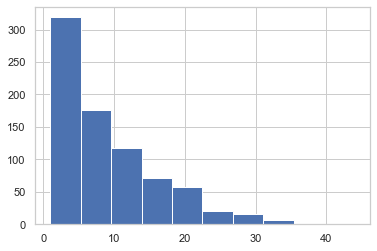

In [41]:
plt.hist(df1['tiempo_ue_actual_num'])

(array([  9.,  21.,   0.,  50.,   0.,  58., 112.,   0.,  52., 454.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

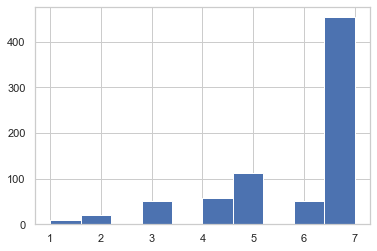

In [42]:
plt.hist(df1['dias_uso_internet'])

In [46]:
df1['tiempo_ue_actual_num'] = df1['tiempo_ue_actual_num'].fillna(df1['tiempo_ue_actual_num'].mean())
df1['dias_uso_internet'] = df1['dias_uso_internet'].fillna(df1['dias_uso_internet'].mean())
df1.head()

C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pproyinc,neducmax,gender,areaimpa,curso_tec,edad,anios_experiencia,tiempo_ue_actual_num,dias_uso_internet,y
0,1,2,1,0,1,32,20,15.000000,7.0,1
1,1,2,1,1,1,38,19,5.000000,5.0,1
2,1,1,0,1,1,54,20,5.000000,7.0,1
3,1,2,0,1,1,54,26,9.145038,5.0,1
4,1,2,1,0,1,34,10,7.000000,7.0,1


In [47]:
X=df1[df1.columns[:-1]]
y=df1['y']
X.head()

,pproyinc,neducmax,gender,areaimpa,curso_tec,edad,anios_experiencia,tiempo_ue_actual_num,dias_uso_internet
0,1,2,1,0,1,32,20,15.000000,7.0
1,1,2,1,1,1,38,19,5.000000,5.0
2,1,1,0,1,1,54,20,5.000000,7.0
3,1,2,0,1,1,54,26,9.145038,5.0
4,1,2,1,0,1,34,10,7.000000,7.0


In [76]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
os_X_train, os_X_test, os_y_train, os_y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=25)

In [77]:
#X_train.shape
#print(X.shape)
#print(os_data_X.shape)
print(y.value_counts())
print(os_data_y.value_counts())

1    636
0    235
Name: y, dtype: int64
y
1    441
0    441
dtype: int64


**Modelo**

In [78]:
reg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)
reg.fit(os_X_train,os_y_train)

C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=-1,
          penalty='l2', random_state=25, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
pred=reg.predict(os_X_test)
reg_cv=cross_val_score(reg, os_X_train, os_y_train, cv=10).mean()

C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ivan.ali

In [83]:
print('Coef de determinación: %.3f' % reg.score(X_test, y_test))
print('Cross-validation $R^2$: %0.3f' % reg_cv)
print('Precision: %.3f' % precision_score(os_y_test, pred))
print('Proporción de verdaderos positivos : %.3f' % recall_score(os_y_test, pred))
print('Contribución de la precision ponderada(F1 score): %.3f' % f1_score(os_y_test, pred))

Coef de determinación: 0.557
Cross-validation $R^2$: 0.603
Precision: 0.557
Proporción de verdaderos positivos : 0.391
Contribución de la precision ponderada(F1 score): 0.460


In [86]:
y_pred =reg.predict(os_X_test)
print('Precición de modelo logistico para clasificar segun la data test: {:.2f}'.format(reg.score(os_X_test, os_y_test)))

Precición de modelo logistico para clasificar segun la data test: 0.52


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(os_y_test, y_pred)
print(confusion_matrix)

[[84 43]
 [84 54]]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(os_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.66      0.57       127
           1       0.56      0.39      0.46       138

   micro avg       0.52      0.52      0.52       265
   macro avg       0.53      0.53      0.51       265
weighted avg       0.53      0.52      0.51       265



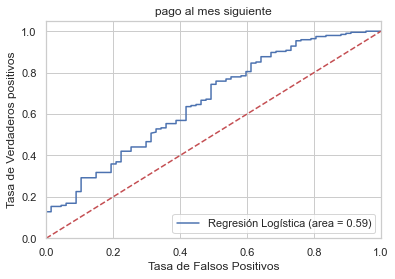

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('pago al mes siguiente')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()